In [1]:
from feature_selector import FeatureSelector

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [2]:
import pandas as pd
import pickle as pickle
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings; warnings.simplefilter('ignore')

In [3]:
train = pd.read_pickle('../data/train_test/X_train.pkl')

In [4]:
train.shape

(76260, 66)

In [5]:
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = train, labels = train.columns)

### Missing Values

In [6]:
fs.identify_missing(missing_threshold = 0.6)

6 features with greater than 0.60 missing values.



In [9]:
fs.missing_stats.head(6)


,missing_fraction
motivo_contacto_cod,1.000000
target_aux,0.938054
diff_dt_sini_danioacc,0.668607
diff_dt_sini_compra,0.660031
diff_dt_alta_sini,0.659992
diff_dt_sini_certemit,0.659992


In [10]:
missing_features = fs.ops['missing']
missing_features[:6]

['motivo_contacto_cod',
 'diff_dt_alta_sini',
 'diff_dt_sini_certemit',
 'diff_dt_sini_compra',
 'diff_dt_sini_danioacc',
 'target_aux']

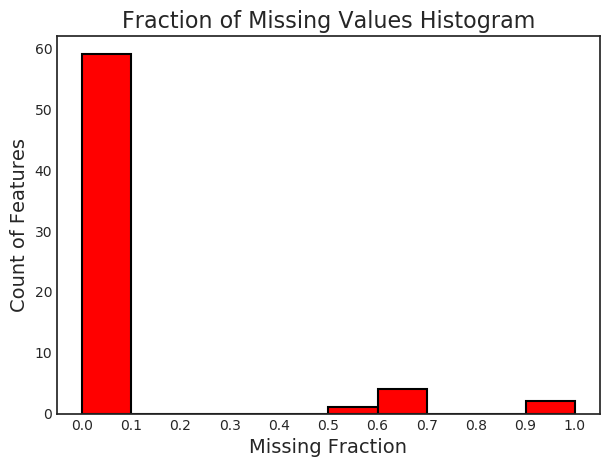

In [11]:
fs.plot_missing()

### Collinear Features

In [13]:
fs.identify_collinear(correlation_threshold = 0.7)

27 features with a correlation magnitude greater than 0.70.



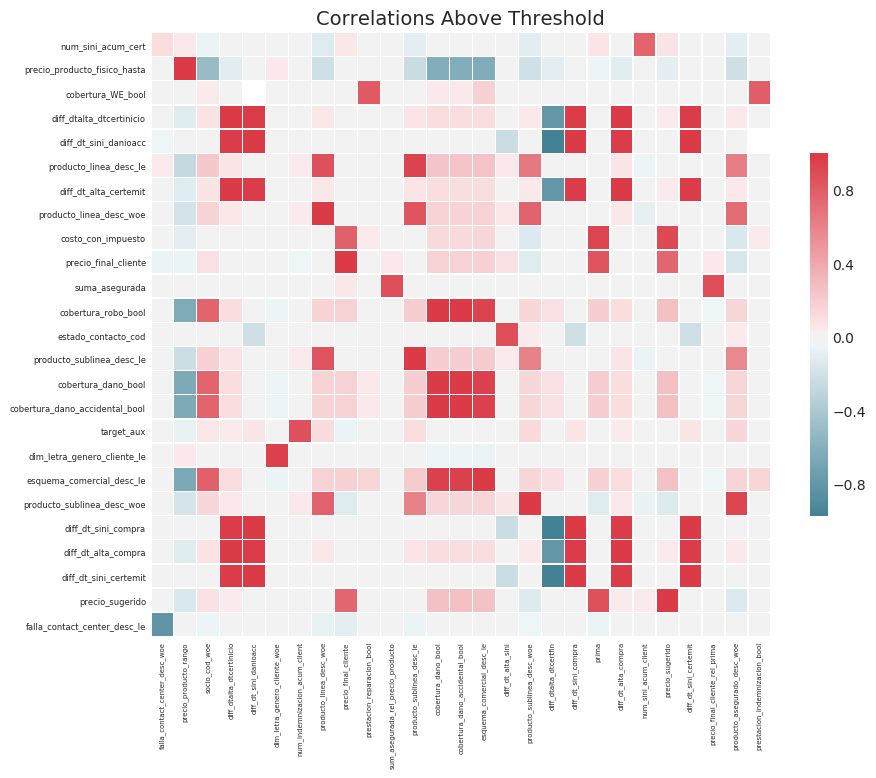

In [14]:
fs.plot_collinear()

In [15]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']# dataframe of collinear features
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,cobertura_dano_bool,cobertura_robo_bool,0.993930
1,cobertura_dano_accidental_bool,cobertura_robo_bool,0.993930
2,cobertura_dano_accidental_bool,cobertura_dano_bool,1.000000
3,prestacion_indemnizacion_bool,cobertura_WE_bool,0.794841
4,prestacion_reparacion_bool,cobertura_WE_bool,0.826195


### Single Unique Value Features

In [16]:
fs.identify_single_unique()

1 features with a single unique value.



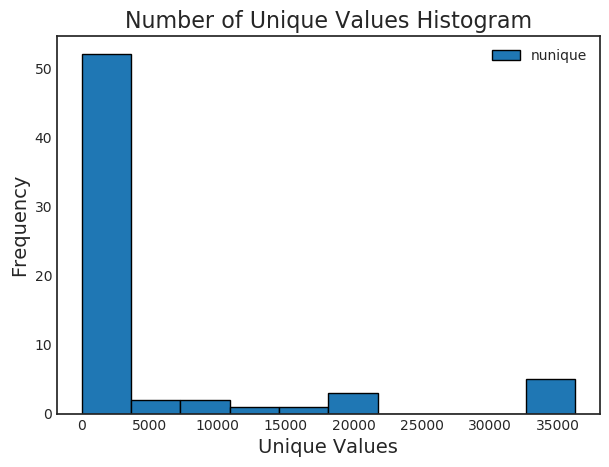

In [17]:
fs.plot_unique()

In [20]:
fs.ops['single_unique']

['diff_dt_certemit_compra']

### Removing Constant features

In [22]:
constant_filter = VarianceThreshold(threshold=0)

In [25]:
features = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [36]:
constant_filter.fit(train[features].replace([np.inf, -np.inf, np.nan],0))

VarianceThreshold(threshold=0)

In [40]:
print(len(train.columns[constant_filter.get_support()]), " features are not constant")

64  features are not constant


In [42]:
constant_columns = [column for column in train.columns
                    if column not in train.columns[constant_filter.get_support()]]

print(len(constant_columns), " features are constant")

2  features are constant


In [43]:
print(constant_columns)

['motivo_contacto_cod', 'diff_dt_certemit_compra']


In [52]:
# removing constant features
train = constant_filter.transform(train)
test = constant_filter.transform(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Removing Quasi-Constant Features

In [44]:
qconstant_filter = VarianceThreshold(threshold=0.01)

In [45]:
features = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [46]:
qconstant_filter.fit(train[features].replace([np.inf, -np.inf, np.nan],0))

VarianceThreshold(threshold=0.01)

In [47]:
print(len(train.columns[qconstant_filter.get_support()]), " features are not quasi-constant")

51  features are not quasi-constant


In [49]:
quasiconstant_columns = [column for column in train.columns
                    if column not in train.columns[qconstant_filter.get_support()]]

print(len(quasiconstant_columns), " features are quasi-constant")

15  features are quasi-constant


In [51]:
for q in quasiconstant_columns:
    print(q)

motivo_contacto_cod
producto_ingreso_golpeado_bool
cobertura_WE_bool
requiere_gestion_evento_bool
prestacion_indemnizacion_bool
prestacion_reemplazo_bool
prestacion_reparacion_bool
costo_con_impuesto
costo_incremental_con_impuesto
precio_final_cliente
precio_sugerido
prima
diff_dt_certemit_compra
dim_letra_genero_cliente_woe
dim_desc_estado_civil_cliente_woe


In [ ]:
train = qconstant_filter.transform(train)
test = qconstant_filter.transform(test)

### Removing Duplicate Features

In [54]:
train_features_T = train.T
train_features_T.shape

(66, 76260)

In [55]:
print("Number of features duplicate", train_features_T.duplicated().sum())

Number of features duplicate 2


In [59]:
unique_features = train_features_T.drop_duplicates(keep='first').T.columns.tolist()

In [61]:
unique_features[:5]

['motivo_contacto_cod',
 'localidad_cod',
 'producto_ingreso_rayado_bool',
 'producto_ingreso_manchado_bool',
 'producto_ingreso_golpeado_bool']

In [ ]:
train = train[unique_features]
test = test[unique_features]

### Zero Importance Features

In [62]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model



ValueError: Found input variables with inconsistent numbers of samples: [76260, 66]